In [1]:
!pip install import_ipynb
!pip install dtw-python

  Created wheel for import-ipynb: filename=import_ipynb-0.1.3-py3-none-any.whl size=2975 sha256=8e18dcdfddb4d0b198a15938a7036f2e377f4a13c216df9f189300791c604b87
  Stored in directory: /Users/yunhyejin/Library/Caches/pip/wheels/06/7e/ad/1cb03e935234186825cefc7e2c8f3451b4f654b5bc72232a7b
Successfully built import-ipynb
     |████████████████████████████████| 307 kB 1.2 MB/s eta 0:00:01
     |████████████████████████████████| 16.0 MB 10.6 MB/s eta 0:00:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.18.5
    Uninstalling numpy-1.18.5:
      Successfully uninstalled numpy-1.18.5


In [2]:
# Initial Setting
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import import_ipynb
import Function
from dtw import *
from pykrx import stock
from sklearn.preprocessing import MinMaxScaler

importing Jupyter notebook from Function.ipynb
Importing the dtw module. When using in academic works please cite:
  T. Giorgino. Computing and Visualizing Dynamic Time Warping Alignments in R: The dtw Package.
  J. Stat. Soft., doi:10.18637/jss.v031.i07.



In [3]:
kospi_200 = stock.get_index_portfolio_deposit_file("1028")

In [4]:
df = pd.DataFrame(columns=['시가', '고가', '저가', '종가', '거래량', '종목명', '종목코드'])
for i in kospi_200:
    tmp_df = stock.get_market_ohlcv_by_date("20200101", "20210101", i, "y")
    name = stock.get_market_ticker_name(i)
    tmp_df['종목명'] = name
    tmp_df['종목코드'] = i
    df = df.append(tmp_df)

거래량 순으로 정렬:

In [5]:
sorted_df = df.sort_values(by=['거래량'], axis=0, ascending = False)
print(sorted_df.head(30))
code_df = sorted_df.iloc[:30, 6]

                시가      고가     저가      종가           거래량      종목명    종목코드
2020-12-31   55500   81300  42300   81000  5.471749e+09     삼성전자  005930
2020-12-31    3305    7980   2920    4695  3.397658e+09    남선알미늄  008350
2020-12-31    7270    7930   3070    7040  2.263565e+09    삼성중공업  010140
2020-12-31    5550   10550   2500    7920  2.128066e+09  두산인프라코어  042670
2020-12-31    7330  214000      0  124000  2.036548e+09     신풍제약  019170
2020-12-31    2315    2870    881    2440  1.870908e+09     한화생명  088350
2020-12-31   23257   29713      0   18000  1.699525e+09   아시아나항공  020560
2020-12-31    5263   17700   2200   13500  1.497275e+09    두산중공업  034020
2020-12-31    6650   12800   3530    8040  1.351267e+09     영진약품  003520
2020-12-31    3555   15250   2120   13950  1.163048e+09      HMM  011200
2020-12-31   13112   42537  11285   28100  1.068908e+09     부광약품  003000
2020-12-31   96000  121000  65800  118500  1.027574e+09   SK하이닉스  000660
2020-12-31   28100   30050  15550   27400  9.467680

In [6]:
def volume_ret_df(date_1, date_2, date_3, date_4):
    code_list = []
    name_list = []
    f_list = []
    o_list = []
    p_list = []
    for i in range(len(code_df)):
        code_tmp = code_df[i]
        name_tmp = stock.get_market_ticker_name(code_tmp)
        volume_df = stock.get_market_trading_volume_by_date(date_1, date_2, code_tmp)
        code_list.append(code_tmp)
        name_list.append(name_tmp)
        f_list.append(volume_df['외국인합계'].sum())
        o_list.append(volume_df['기관합계'].sum())
        p_list.append(volume_df['개인'].sum())
    result_df = pd.DataFrame(columns=['종목코드', '종목명', '외국인거래량', '기관거래량', '개인거래량', '수익률'])
    result_df['종목코드'] = code_list
    result_df['종목명'] = name_list
    result_df['외국인거래량'] = f_list
    result_df['기관거래량'] = o_list
    result_df['개인거래량'] = p_list
    ret_list = []
    for i in range(len(code_df)):
        code_tmp = code_df[i]
        tmp_df = stock.get_market_ohlcv_by_date(date_3, date_4, code_tmp)
        ret_tmp = (tmp_df.iloc[4, 3] / tmp_df.iloc[0, 0] - 1) * 100
        ret_list.append(ret_tmp)
    result_df['수익률'] = ret_list
    return result_df

/Users/yunhyejin/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/yunhyejin/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


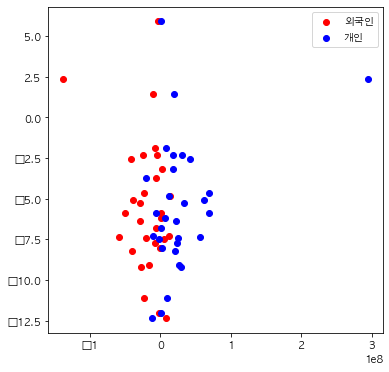

In [59]:
a_df = volume_ret_df("20200101", "20210131", "20200101", "20210131")
plt.figure(figsize = (6, 6))
plt.scatter(a_df['외국인거래량'], a_df['수익률'], c = 'r', label = '외국인')
plt.scatter(a_df['개인거래량'], a_df['수익률'], c = 'b', label = '개인')

plt.legend()
plt.show()

In [60]:
y=a_df['수익률'].astype(int)
x1=a_df['외국인거래량']
x2=a_df['개인거래량']
x=list(zip(x1,x2))

In [61]:
from sklearn.svm import SVC 
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

svc = SVC(kernel='rbf', class_weight='balanced')
svc.get_params().keys()

dict_keys(['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])

In [62]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(x, y, random_state=33)

In [67]:
from sklearn.model_selection  import GridSearchCV
param_grid = {'C': [1, 5, 10, 50],
              'gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(svc, param_grid, cv=5)

In [68]:
#from sklearn.pipeline import Pipeline
#from sklearn.preprocessing import StandardScaler

#rbf_kernel_svm_clf=Pipeline([('scaler', StandardScaler()),
                            #('svm_clf',SVC(kernel='rbf',gamma=0.0001,C=1))])
#rbf_kernel_svm_clf.fit(x,y)

In [69]:
svc.fit(Xtest,ytest)
svc.score(Xtest, ytest)

0.75

In [78]:
from sklearn.metrics import accuracy_score
#예측
y_svc_pred=svc.predict(Xtest)
print('예측값:',y_svc_pred[:5])

#성능 평가
svc_acc=accuracy_score(ytest,y_svc_pred)
print('Accuracy:%.4f' %svc_acc)

예측값: [-6 -6 -6 -5 -6]
Accuracy:0.0000
